# PCA Beyond Dimensionality Reduction

Principal Component Analysis (PCA) is one of unsupervised algorithms most broadly used. It is flexible, fast, easily interpretable, and has many applications. In this notebook, we will introduce two of them:
- PCA for Visualization
- PCA as Noise Filtering

In [1]:
import numpy as np

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


## PCA for Visualization: Hand-written Digits

With high-dimensional data, it is not easy to visualize the relationships between variables or the distribution of data points. PCA can reduce the number of dimensions to two or three principal components, which can then be easily graphed.

Let's consider the optical character recognition problem: the identification of hand-written digits.

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: `1797` samples each consisting of an `8×8` grid of pixels.

Let's visualize the first hundred.

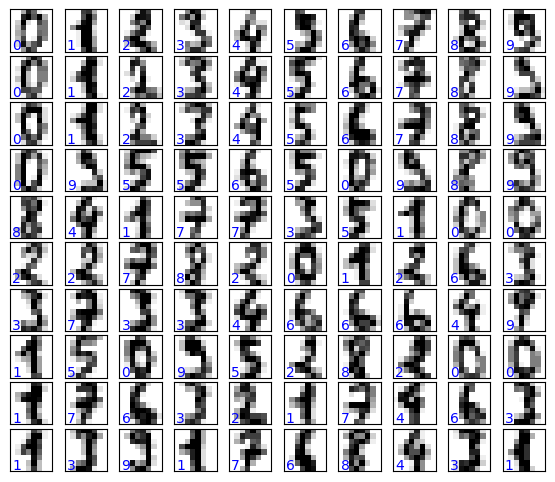

In [4]:
fig, axes = plt.subplots(10, 10, figsize=(7,6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='blue')

To work with this data within Scikit-Learn, we need a two-dimensional representation, `[n_samples, n_features]`.

We can accomplish this by treating each pixel in the image as a feature: by flattening out the pixel arrays so that we have an `8 x 8 = 64` length array of pixel values representing each digit.

Additionally, we need the target array, which gives the previously determined label for each digit.

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
# Applying PCA for projecting 64 features into 2 dimensions
pca2 = PCA(n_components=2)        
pca2

PCA(n_components=2)

In [7]:
projected = pca2.fit_transform(digits.data)

In [8]:
print('Original shape:   ', digits.data.shape)
print('Transformed shape:', projected.shape)

Original shape:    (1797, 64)
Transformed shape: (1797, 2)


We can now plot the first two principal components of each point to learn about the data.

In [9]:
# Create a scatter plot 
fig = px.scatter(x=projected[:, 0], y=projected[:, 1], color=digits.target.astype(str),                 
                 labels={'color': 'Digit Target'},      # Labeling the color bar
                 width=700, height=500, title='PCA of Digits Dataset')

# Update the layout to add axis labels
fig.update_layout(xaxis_title='Component 1', yaxis_title='Component 2')

# Show color scale (color bar)
fig.update_traces(marker=dict(size=6, line=dict(width=0)), 
                  selector=dict(mode='markers'))

# Show the figure
fig.show()

The graph's legend is interactive. You can click the color associated with one or more numbers, and they will appear/disappear in the graph.

The whole data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance: components 1 and 2.

We have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions and have done this `unsupervised` without reference to the labels.

### Choosing the number of components

A vital part of using PCA in practice is estimating how many components are needed to describe the data. It can be determined by looking at the explained variance ratio or the cumulative explained variance ratio as a function of the number of components.

In [10]:
pcaD = PCA().fit(digits.data)

In [11]:
# Getting the Explained Variance Ratio
explained_variance = pcaD.explained_variance_ratio_.round(3)
explained_variance

array([0.149, 0.136, 0.118, 0.084, 0.058, 0.049, 0.043, 0.037, 0.034,
       0.031, 0.024, 0.023, 0.018, 0.018, 0.015, 0.014, 0.013, 0.012,
       0.01 , 0.009, 0.009, 0.008, 0.008, 0.007, 0.007, 0.006, 0.006,
       0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [12]:
components = list(range(1,len(explained_variance)+1))

In [13]:
# Plotting the Explained Variance Ratio
fig1 = px.scatter(x=components, y=explained_variance) 
fig1.update_traces(marker=dict(size=6, opacity=0.7, color='crimson'),            
            hovertemplate='Component: %{x}<br>Explained Variance Ratio: %{y:.3f}')
fig1.update_layout(title='Explained Variance',
            xaxis_title='Number of components', 
            yaxis_title='Cumulative explained variance',
            width=700)
fig1.show()

Hover over the graph. Over each point, you will see the component value and the explained variance ratio. 

As you can see, from components 50 to 64, the explained variance ratio is 0; at least the first three decimal places are 0.

Let's compute and graph the cumulative variance.

In [14]:
cumulative_variance = np.cumsum(pcaD.explained_variance_ratio_)
cumulative_variance.round(3)

array([0.149, 0.285, 0.403, 0.487, 0.545, 0.594, 0.637, 0.674, 0.707,
       0.738, 0.762, 0.785, 0.803, 0.821, 0.835, 0.849, 0.863, 0.875,
       0.885, 0.894, 0.903, 0.911, 0.919, 0.926, 0.933, 0.939, 0.945,
       0.95 , 0.955, 0.959, 0.963, 0.966, 0.97 , 0.973, 0.976, 0.979,
       0.982, 0.984, 0.986, 0.988, 0.99 , 0.992, 0.993, 0.995, 0.996,
       0.997, 0.998, 0.999, 0.999, 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [15]:
# Plot Cumulative Explained Variance
fig2 = px.scatter(x=components, y=cumulative_variance)
fig2.update_traces(marker=dict(size=6, opacity=0.7, color='royalblue'),
            hovertemplate='Component: %{x}<br>Cumulative Explained Variance: %{y:.3f}')
fig2.update_layout(title='Cumulative Explained Variance',
            xaxis_title='Number of components', 
            yaxis_title='Cumulative explained variance',
            width=700)
fig2.show()

You can use the graph to determine the number of components. Hovering over it allows you to see the exact value of the cumulative variance and choose a proper number of components. For instance:
- with the first 13 components you get 80% of the total variance,
- with the first 21 components you get 90% of the total variance.

Choosing the threshold for the cumulative explained variance in PCA depends on the specific requirements of your analysis or application. An acceptable value could be between 70-95%. Fewer components can make the model more interpretable, which benefits many applications. However, too few components might lead to an oversimplified model that misses essential information.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.

The idea is this: any components with a variance much larger than the effect of the noise should be relatively unaffected by the noise.

If you reconstruct the data using just the largest subset of principal components, you should preferentially keep the signal and throw out the noise.

Let's see how this looks with the digits data. First, we will plot several of the input noise-free data.

In [16]:
def plot_digits(data):
    '''
    Function to plot digits
    '''
    fig, axes = plt.subplots(4, 10, figsize=(8, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', 
                  interpolation='nearest', clim=(0,16))  

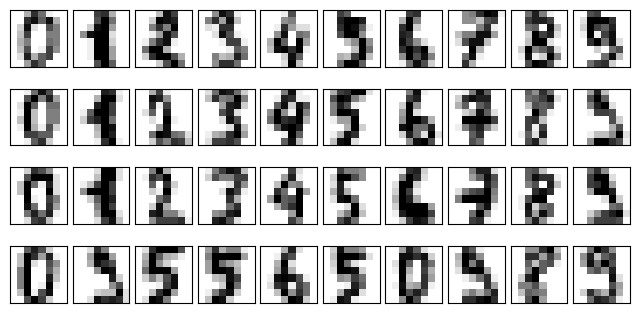

In [17]:
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it.

In [18]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)

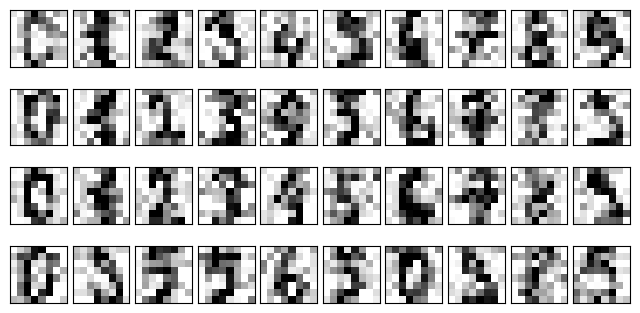

In [19]:
# Plotting the noisy digits
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.

Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance.

### Using PCA with 50% of the variance

In [20]:
pcaN = PCA(0.50).fit(noisy)
print('For preserving 50%% of the variance, you will need %d components.' %(pcaN.n_components_))

For preserving 50% of the variance, you will need 12 components.


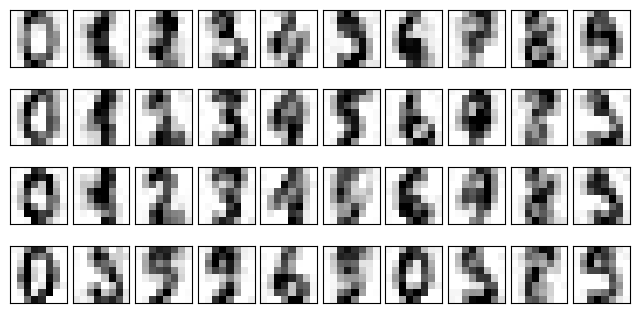

In [21]:
components = pcaN.transform(noisy)
filtered = pcaN.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

### Using PCA with 25% of the variance

In [22]:
pcaN25 = PCA(0.25).fit(noisy)
print('For preserving 25%% of the variance, you will need %d components.' %(pcaN25.n_components_))

For preserving 25% of the variance, you will need 4 components.


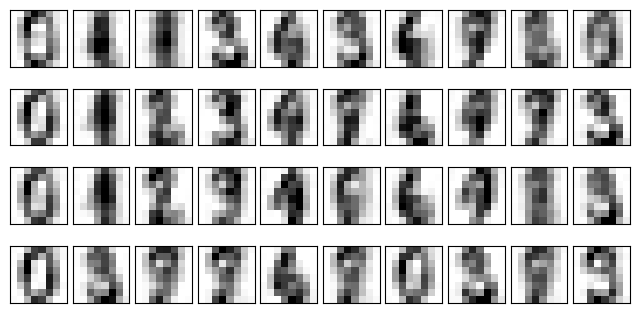

In [23]:
components25 = pcaN25.transform(noisy)
filtered25 = pcaN25.inverse_transform(components25)
plot_digits(filtered25)

25% of the variance is a low. Observe we are losing information about numbers. 

### Using PCA with 75% of the variance

In [24]:
pcaN75 = PCA(0.75).fit(noisy)
print('For preserving 75%% of the variance, you will need %d components.' %(pcaN75.n_components_))

For preserving 75% of the variance, you will need 31 components.


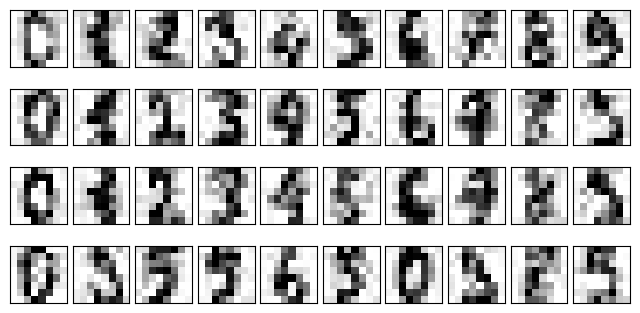

In [25]:
components75 = pcaN75.transform(noisy)
filtered75 = pcaN75.inverse_transform(components75)
plot_digits(filtered75)

75% of the variance is too much. Observe the figure is too close to the original noisy figure, so we are not removing the noise.

 PCA reduces noise in data by identifying and retaining only the significant principal components that capture the essence or signal of the data, thereby discarding components that are likely to represent noise.

## References

- https://scikit-learn.org/stable/unsupervised_learning.html
- Muller, A.C. & Guido, S. (2017) Introduction to Machine Learning with Python. A guide for Data scientists. USA: O'Reilly, chapter 3.
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O'Reilly Media, Inc. chapter 5.